In [121]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics


# The National Baseball Hall of Fame and Museum is located in Cooperstown, New York and was dedicated in 1939. A baseball player can be elected to the Hall of Fame if they meet the following criteria:

-The player must have competed in at least ten seasons;

-The player has been retired for at least five seasons;

-A screening committee must approve the player’s worthiness to be included on the ballot and most players who played regularly for ten or more years are deemed worthy;

-The player must not be on the ineligible list (that means that the player should not be banned from baseball);

-A player is considered elected if he receives at least 75% of the vote in the election; and

-A player stays on the ballot the following year if they receive at least 5% of the vote and can appear on ballots for a maximum of 10 years.

In [4]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
HOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/HallOfFame.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv')
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')

In [5]:
HOF

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN
5,lajoina01,1936,BBWAA,226.0,170.0,146.0,N,Player,NaN
6,speaktr01,1936,BBWAA,226.0,170.0,133.0,N,Player,NaN
7,youngcy01,1936,BBWAA,226.0,170.0,111.0,N,Player,NaN
8,hornsro01,1936,BBWAA,226.0,170.0,105.0,N,Player,NaN
9,cochrmi01,1936,BBWAA,226.0,170.0,80.0,N,Player,NaN


In [6]:
HOF= HOF.sort_values('playerID')
HOF.drop(['needed_note'], axis=1, inplace=True)
HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
#HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
Batting.drop(['CS','SH', 'GIDP', 'IBB'], axis=1, inplace=True)
HOF

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category
2860,aaronha01,1982,BBWAA,415.0,312.0,406.0,Y,Player
3743,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player
1305,adamsba01,1953,BBWAA,264.0,198.0,17.0,N,Player
1444,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player
1390,adamsba01,1954,BBWAA,252.0,189.0,13.0,N,Player
1236,adamsba01,1952,BBWAA,234.0,176.0,9.0,N,Player
1144,adamsba01,1951,BBWAA,226.0,170.0,12.0,N,Player
1052,adamsba01,1950,BBWAA,168.0,126.0,6.0,N,Player
146,adamsba01,1937,BBWAA,201.0,151.0,8.0,N,Player
826,adamsba01,1948,BBWAA,121.0,91.0,4.0,N,Player


In [7]:
hofn = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]
hofy = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]


In [8]:
inductees = hofy.playerID.unique()
rejected = hofn.playerID.unique()

In [9]:
#master1 = master1.loc[lambda master1: master1['category'] == 'Player', :]
#HOF1 = HOF1.loc[lambda HOF1: HOF1['votedBY'] != 'Negro League', :]

##make clearer names for masterid and masterid1
MasterID = pd.merge(Batting, hofy, on='playerID')
#HOF= HOF1.sort_values('playerID')
MasterID["avg."]=MasterID.H/MasterID.AB
MasterID["1B"]=(MasterID.H-MasterID["3B"]-MasterID["2B"])
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["slug"]=(MasterID["1B"] + 2*MasterID["2B"] + MasterID["3B"]*3 + 4*MasterID.HR)/MasterID.AB
MasterID["OPS"] = MasterID.OBP + MasterID.slug

#never admitted
#neveramitted players who were not admitted to HOF
MasterID1 = pd.merge(Batting, hofn, on='playerID', how="outer")
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
MasterID1["avg."]=MasterID1.H/MasterID1.AB
MasterID1["1B"]=(MasterID1.H-MasterID1["3B"]-MasterID1["2B"])
MasterID1["OBP"]= (MasterID1.H + MasterID1.BB + MasterID1.HBP ) / (MasterID1.AB + MasterID1.BB + MasterID1.HBP + MasterID1.SF)
MasterID1["slug"]=(MasterID1["1B"] + 2*MasterID1["2B"] + MasterID1["3B"]*3 + 4*MasterID1.HR)/MasterID1.AB
MasterID1["OPS"] = MasterID1.OBP + MasterID1.slug


#in order to make sure includes the players who were eventually inducted we created admitted/neveradmitted to differentiate
# = MasterID1.loc[lambda MasterID1: MasterID1['votes'] > 10, :]
#MasterID1= MasterID1.sort_values('votes', ascending = False)
admitted = MasterID1.loc[MasterID1.playerID.isin(inductees)]
neveradmitted = MasterID1.loc[~MasterID1.playerID.isin(inductees)]
#neveradmitted.drop(["needed","yearid","yearID", "teamID", "ballots", "votes", "needed_note", "category","avg.", "votedBy"], axis=1, inplace=True)
neveradmitted = neveradmitted.drop_duplicates()
neveradmitted = neveradmitted.groupby(['playerID']).sum()
neveradmitted['admitted'] = 0

#HOF.drop(['teamID', 'lgID','ballots','needed', 'votes'], axis=1, inplace=True)
#Master1.drop(['category'])
#HOF1=HOF1.groupby(['playerID'])['HR']
MasterID = MasterID.sort_values('playerID')
careerstats = MasterID.groupby(['playerID']).sum()
seasonsplayed = MasterID.playerID.value_counts()
careerstats["Career Avg."] = careerstats['H']/careerstats['AB']
careerstats.drop(['yearID', 'yearid', 'ballots', 'needed', 'votes', 'avg.', 'OBP', 'slug', 'OPS'], axis=1, inplace=True)
careerstats["OBP"]= (careerstats.H + careerstats.BB + careerstats.HBP ) / (careerstats.AB + careerstats.BB + careerstats.HBP + careerstats.SF)
careerstats["slug"]=( careerstats["1B"] + 2* careerstats["2B"] +  careerstats["3B"]*3 + 4* careerstats.HR)/ careerstats.AB
careerstats["OPS"] =  careerstats.OBP +  careerstats.slug
careerstats['admitted'] = 1

neveradmitted.head(5)


,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,yearid,ballots,needed,votes,avg.,1B,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,,
aguilri01,37863.0,22.0,737.0,139.0,12.0,28.0,3.0,0.0,3.0,11.0,...,38114.0,9880.0,7410.0,57.0,0.909641,25.0,1.119903,1.247059,2.366962,0
alomasa02,43958.0,24.0,1377.0,4530.0,520.0,1236.0,249.0,10.0,112.0,588.0,...,44286.0,12518.0,9394.0,352.0,5.501731,977.0,6.254701,8.610274,14.864975,0
aloumo01,35981.0,19.0,1942.0,7037.0,1109.0,2134.0,421.0,39.0,332.0,1287.0,...,36252.0,10278.0,7722.0,108.0,5.308886,1674.0,6.319007,9.376323,15.695331,0
anderbr01,31913.0,17.0,1834.0,6499.0,1062.0,1661.0,338.0,67.0,210.0,761.0,...,32128.0,8688.0,6528.0,0.0,3.878434,1256.0,5.562575,6.650673,12.213247,0
anderga01,34034.0,17.0,2228.0,8640.0,1084.0,2529.0,522.0,36.0,287.0,1365.0,...,34272.0,7480.0,5610.0,17.0,4.989218,1971.0,5.486938,8.131875,13.618813,0


In [10]:
careerstats.head(5)

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SF,1B,Career Avg.,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,121.0,3049,0.304998,0.373949,0.615577,0.989527,1
alexape01,22,703,1810,154,378,60,13,11,163.0,3.0,77,276.0,2.0,0.0,305,0.208840,0.241927,0.280663,0.522590,1
alomaro01,21,2379,9073,1508,2724,504,80,210,1134.0,474.0,1032,1140.0,50.0,97.0,2140,0.300231,0.371245,0.465998,0.837243,1
ansonca01,27,2523,10277,1996,3418,581,142,97,2076.0,276.0,983,302.0,32.0,0.0,2695,0.332587,0.392579,0.454510,0.847089,1
aparilu01,18,2601,10230,1335,2677,394,92,83,791.0,506.0,736,742.0,27.0,76.0,2191,0.261681,0.310778,0.350635,0.661413,1


In [11]:
#MasterID1 = pd.merge(Batting, HOF2, on='playerID', how="outer")
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
# = MasterID1.loc[lambda MasterID1: MasterID1['votes'] > 10, :]
#MasterID1= MasterID1.sort_values('votes', ascending = False)
#admitted = MasterID1.loc[MasterID1.playerID.isin(inductees)]
#neveradmitted = MasterID1.loc[~MasterID1.playerID.isin(inductees)]
##neveradmitted.drop(["needed","yearid","yearID", "teamID", "ballots", "votes", "needed_note", "category","avg.", "votedBy"], axis=1, inplace=True)
#neveradmitted = neveradmitted.drop_duplicates()
#neveradmitted = neveradmitted.groupby(['playerID']).sum()
#neveradmitted['admitted'] = 0


In [12]:
frames = [careerstats,neveradmitted]
result = pd.concat(frames)

C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [13]:

result = result.sort_index()

result = result.dropna(axis = 1)
#result = result.dropna(axis = 0)
result["Career Avg."] = result['H']/result["AB"]

result.tail(100)


,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
robinbr01,2298.0,482.0,68.0,10654.0,860.0,2896.0,2848.0,53.0,268.0,0.321976,0.747919,1232.0,1357.0,28.0,114.0,990.0,1,0.425943,23.0,0.267317
robinfr02,2343.0,528.0,72.0,10006.0,1420.0,2808.0,2943.0,198.0,586.0,0.388965,0.984507,1829.0,1812.0,204.0,102.0,1532.0,1,0.595543,23.0,0.294124
robinja02,1191.0,273.0,54.0,4877.0,740.0,1382.0,1518.0,72.0,137.0,0.408915,0.910658,947.0,734.0,197.0,9.0,291.0,1,0.501743,10.0,0.311257
rodriiv01,2221.0,572.0,51.0,9592.0,513.0,2543.0,2844.0,58.0,311.0,0.333529,0.829984,1354.0,1332.0,127.0,76.0,1474.0,1,0.496455,25.0,0.296497
rogerke01,7.0,1.0,1.0,66.0,4.0,763.0,9.0,0.0,0.0,2.111376,4.683757,5.0,4.0,1.0,0.0,25.0,0,2.572381,22.0,0.136364
roushed01,1855.0,339.0,182.0,7363.0,484.0,1967.0,2376.0,53.0,68.0,0.368734,0.823848,1099.0,981.0,268.0,0.0,260.0,1,0.455113,20.0,0.322695
rueteki01,86.0,9.0,0.0,622.0,27.0,349.0,95.0,0.0,0.0,2.489722,4.594990,44.0,40.0,1.0,5.0,105.0,0,2.105268,15.0,0.152733
ruffire01,410.0,98.0,13.0,1937.0,97.0,882.0,521.0,6.0,36.0,0.305882,0.713213,207.0,273.0,1.0,0.0,266.0,1,0.407331,24.0,0.268973
rusieam01,357.0,42.0,29.0,1730.0,27.0,487.0,428.0,6.0,8.0,0.261486,0.585186,209.0,176.0,25.0,0.0,170.0,1,0.323699,10.0,0.247399


In [14]:
result[result["admitted"]==0]

,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
aguilri01,25.0,3.0,0.0,139.0,6.0,737.0,28.0,0.0,3.0,1.119903,2.366962,12.0,11.0,0.0,0.0,37.0,0,1.247059,22.0,0.201439
alomasa02,977.0,249.0,10.0,4530.0,212.0,1377.0,1236.0,41.0,112.0,6.254701,14.864975,520.0,588.0,25.0,34.0,499.0,0,8.610274,24.0,0.272848
aloumo01,1674.0,421.0,39.0,7037.0,737.0,1942.0,2134.0,48.0,332.0,6.319007,15.695331,1109.0,1287.0,106.0,82.0,894.0,0,9.376323,19.0,0.303254
anderbr01,1256.0,338.0,67.0,6499.0,960.0,1834.0,1661.0,154.0,210.0,5.562575,12.213247,1062.0,761.0,315.0,50.0,1190.0,0,6.650673,17.0,0.255578
anderga01,1971.0,522.0,36.0,8640.0,429.0,2228.0,2529.0,8.0,287.0,5.486938,13.618813,1084.0,1365.0,80.0,87.0,1224.0,0,8.131875,17.0,0.292708
appieke01,8.0,0.0,0.0,83.0,1.0,414.0,8.0,1.0,0.0,0.307292,0.586862,4.0,4.0,0.0,0.0,39.0,0,0.279570,20.0,0.096386
aurilri01,1253.0,301.0,22.0,5721.0,450.0,1652.0,1576.0,24.0,186.0,5.299094,13.021616,745.0,756.0,23.0,47.0,861.0,0,7.722521,17.0,0.275476
ausmubr01,1275.0,270.0,34.0,6279.0,634.0,1971.0,1579.0,69.0,80.0,6.091176,12.759756,718.0,607.0,102.0,37.0,1034.0,0,6.668580,20.0,0.251473
baergca01,1287.0,279.0,17.0,5439.0,291.0,1630.0,1583.0,73.0,134.0,5.141172,11.799573,731.0,774.0,59.0,66.0,580.0,0,6.658402,18.0,0.291046


Text(0.5,0,'Hrs Hit by Hall of Famers per season')

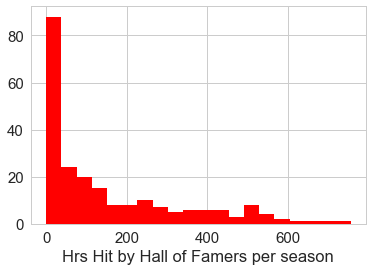

In [15]:
import matplotlib.pyplot as plt
plt.hist(careerstats['HR'].dropna(),bins=20, color = 'red')
plt.xlabel('Hrs Hit by Hall of Famers per season')


Text(0.5,0,'RBI by Hall of Famers')

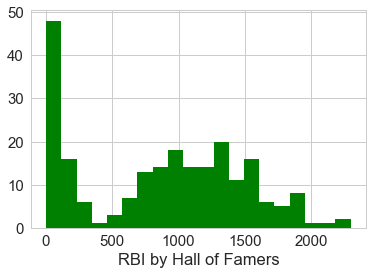

In [16]:
plt.hist(careerstats['RBI'].dropna(),bins=20, color = 'green')
plt.xlabel('RBI by Hall of Famers')

Text(0.5,0,'Career Hits by Hall of Famers')

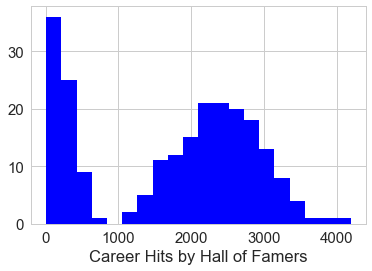

In [17]:
plt.hist(careerstats['H'].dropna(),bins = 20, color = 'blue')
plt.xlabel('Career Hits by Hall of Famers')

Text(0.5,0,'OBP by Hall of Famers')

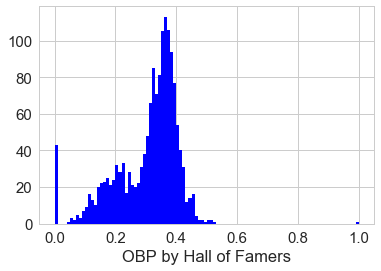

In [18]:
plt.hist(MasterID['OBP'].dropna(),bins=100, color = 'blue')
plt.xlabel('OBP by Hall of Famers')

Text(0.5,0,'Slugging Percentage by Hall of Famers per 100 games or more')

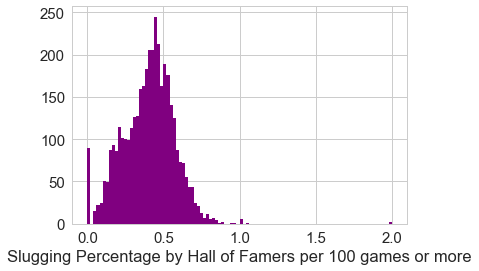

In [19]:
plt.hist(MasterID['slug'].dropna(),bins=100, color = 'purple')
plt.xlabel('Slugging Percentage by Hall of Famers per 100 games or more')

Text(0.5,0,'OPS by Hall of Famers per 100 games or more')

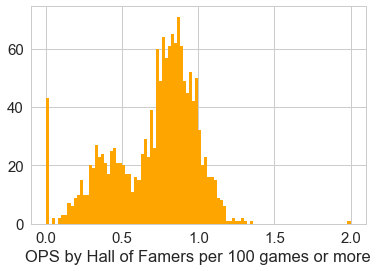

In [20]:
plt.hist(MasterID['OPS'].dropna(),bins=100, color = 'orange')
plt.xlabel('OPS by Hall of Famers per 100 games or more')

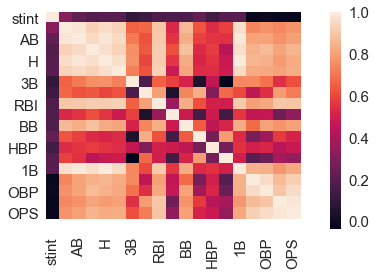

In [21]:
sb.heatmap(careerstats.corr())

#  Linear Regression

In [84]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

In [85]:
predictions[0:10]

array([0.4103216 , 0.45233181, 0.85814372, 0.4390613 , 0.76054974,
       0.43696981, 0.41500018, 0.26717551, 0.27202001, 0.38055554])

ValueError: x and y must be the same size

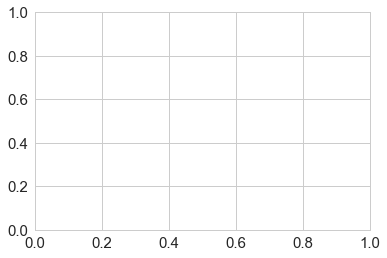

In [98]:
plt.scatter(X_test, predictions)

In [88]:
print (model.score(X_test,Y_test))

ValueError: Found input variables with inconsistent numbers of samples: [103, 82]

In [91]:
# let's determine optimal number of components
result_cols = list(X_train)
pca_model = PCA(n_components = len(result_cols)) # all components
X_PCA = pca_model.fit_transform(X_train)

variance = pca_model.explained_variance_ratio_ #variance ratios                                        

# cumulative sum of variance, for the first [n] features
cv = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals = 3)*100)

C:\Users\ezzan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


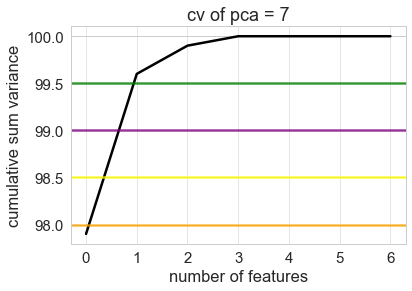

In [97]:
plt.plot(cv, c = 'black')
plt.xlabel('number of features')
plt.ylabel('cumulative sum variance')
plt.xticks(np.arange(0, len(result_cols), 1))
plt.title('cv of pca = {}'.format(len(result_cols)))
plt.axhline(y = 99, color = 'purple', alpha = .75)
plt.axhline(y = 99.5, color = 'green', alpha = .75)
plt.axhline(y = 98, color = 'orange', alpha = .75)
plt.axhline(y = 98.5, color = 'yellow', alpha = .75)
ax = plt.axes()        
ax.xaxis.grid(True, alpha = 0.5) 
plt.show()

In [87]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_Y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_Y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

Coefficients
[[-0.00839791  0.00567024  0.0228553   0.00085025 -0.02212329  0.05260979
  -0.00178528]]
[-0.01047492]

 Accuracy by admission status
admitted    0    1
row_0             
0         155   33
1          30  191

 Percentage accuracy
0.8459657701711492


# KNN Predictor

In [29]:
result.columns

Index(['1B', '2B', '3B', 'AB', 'BB', 'G', 'H', 'HBP', 'HR', 'OBP', 'OPS', 'R',
       'RBI', 'SB', 'SF', 'SO', 'admitted', 'slug', 'stint', 'Career Avg.'],
      dtype='object')

In [30]:
result[result['admitted'] == 0][["HR", "RBI", "Career Avg.", "H", "2B", "3B", "SB"]]
result.dropna()
result.head(200)
result.drop(["baineha01"])
result.drop(["belleal01"])
result.head(5)

,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,3049.0,624.0,98.0,12364.0,1402.0,3298.0,3771.0,32.0,755.0,0.373949,0.989527,2174.0,2297.0,240.0,121.0,1383.0,1,0.615577,23.0,0.304998
aguilri01,25.0,3.0,0.0,139.0,6.0,737.0,28.0,0.0,3.0,1.119903,2.366962,12.0,11.0,0.0,0.0,37.0,0,1.247059,22.0,0.201439
alexape01,305.0,60.0,13.0,1810.0,77.0,703.0,378.0,2.0,11.0,0.241927,0.522590,154.0,163.0,3.0,0.0,276.0,1,0.280663,22.0,0.208840
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,2379.0,2724.0,50.0,210.0,0.371245,0.837243,1508.0,1134.0,474.0,97.0,1140.0,1,0.465998,21.0,0.300231
alomasa02,977.0,249.0,10.0,4530.0,212.0,1377.0,1236.0,41.0,112.0,6.254701,14.864975,520.0,588.0,25.0,34.0,499.0,0,8.610274,24.0,0.272848


In [31]:
result = result.drop(["drewj.01"])

In [147]:
from sklearn.neighbors import KNeighborsClassifier
KNNall = KNeighborsClassifier(n_neighbors=5)
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [148]:
print(KNNall.predict([[755, 2297.0, 0.304998, 3771, 624, 98, 240.0, .700, .350, .500, 1000]]))
print(KNNall.predict_proba([[755, 2297.0, 0.304998, 3771, 624, 98, 240.0, .700, .350, .500, 1000]]))

[1]
[[0.4 0.6]]


In [149]:
print(KNNall.predict([[3.0,11.0,0.201439,28.0,3.0,0.0,0.0,0,0.0,0.0,0 ]]))
print(KNNall.predict_proba([[3.0,11.0,0.201439,28.0,3.0,0.0,0.0,0,0.0,0.0,0 ]]))

[0]
[[0.6 0.4]]


# KNN Predictors (both weightted and unweighted predictors included)

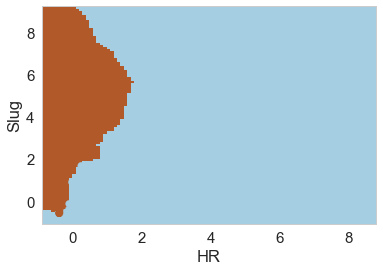

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')


# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'Slug Perct.': stats.zscore(result.slug),
    'SB': stats.zscore(result.SB)
})

# Fit our model.
Y = result.admitted
KNN.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('HR')
plt.ylabel('Slug')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

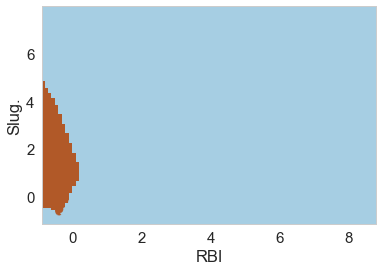

In [151]:
KNN1 = KNeighborsClassifier(n_neighbors=5)

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'Slug Perct.': stats.zscore(result.slug),
    'RBI': stats.zscore(result.RBI)
})

# Fit our model.
Y = result.admitted
KNN1.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('RBI')
plt.ylabel('Slug.')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Different K Variables

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import neighbors
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
KNNall5 = KNeighborsClassifier(n_neighbors=5)
KNNall5w = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall5.fit(X,Y)
KNNall5w.fit(X,Y)
score = cross_val_score(KNNall5, X, Y, cv=5)

print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#rerun KNNall unweighted as well
score1 = cross_val_score(KNNall5w, X, Y, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))


Unweighted Accuracy: 0.81 (+/- 0.13)
weighted Accuracy: 0.81 (+/- 0.13)


In [153]:

from sklearn.neighbors import KNeighborsClassifier

KNNall17 = KNeighborsClassifier(n_neighbors=17)
KNNall17w= KNeighborsClassifier(n_neighbors =17, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall17.fit(X,Y)
KNNall17w.fit(X,Y)
score2 = cross_val_score(KNNall17, X, Y, cv=5)
score3 = cross_val_score(KNNall17w, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
#rerun KNNall unweighted as well
score3 = cross_val_score(KNNall17w, X, Y, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std() * 2))


Unweighted Accuracy: 0.78 (+/- 0.14)
weighted Accuracy: 0.79 (+/- 0.15)


In [154]:
from sklearn.neighbors import KNeighborsClassifier
KNNall20 = KNeighborsClassifier(n_neighbors=20)
KNNall20w = KNeighborsClassifier(n_neighbors=20, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall20.fit(X,Y)
KNNall20w.fit(X,Y)

score = cross_val_score(KNNall20, X, Y, cv=5)
score_w = cross_val_score(KNNall20w, X, Y, cv=5)
print("k = 20, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(KNNall20w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 20, with all stats inputs
Unweighted Accuracy: 0.77 (+/- 0.13)
Weighted Accuracy: 0.78 (+/- 0.13)


In [155]:
knn10 = neighbors.KNeighborsRegressor(n_neighbors=10)
knn10w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

score = cross_val_score(knn10, X, Y, cv=5)
print("k = 10, with HR AND RBI inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn10w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 10, with HR AND RBI inputs
Unweighted Accuracy: 0.39 (+/- 0.37)
Weighted Accuracy: 0.41 (+/- 0.39)


# Cross Testing

### Accuracy Score of Predicition Model : 82.52%
Model below displays corrected predicitons for both players who were rejected and accepted to Hall of Fame. Our predicitons were correct 82% of the time indicating that our prediciton model was moderately efficient.

In [156]:
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNNall.fit(X_train,Y_train)
Y_pred = KNNall.predict(X_test)
accuracy_score(Y_test, Y_pred)

1.0

# Accuracy Score of Confusion Matrix
Both the accuracy scores for the prediction model above and confusion matrx provide equal outcomes. However the results provided from a Naive Bayes model seemed to have been inconsistent with aformentioned models thus proving to be inefficient.

In [157]:
confusion_matrix(Y_test, Y_pred)

array([[41,  0],
       [ 0, 62]], dtype=int64)

In [158]:
(41+62)/103

1.0

### Average Accuracy Score of Cross Validation Mode (KNN)l: 81.68%

In [159]:
cross_val_score(KNNall, X, Y, cv=5)

array([0.85365854, 0.69512195, 0.7804878 , 0.87804878, 0.85185185])

### Accuracy Score of Bernoulli Naive Bayes Matrix (KNN):  61%

In [167]:
#Confusion Matrix

data = X
target = Y

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 49, 136],
       [ 23, 201]], dtype=int64)

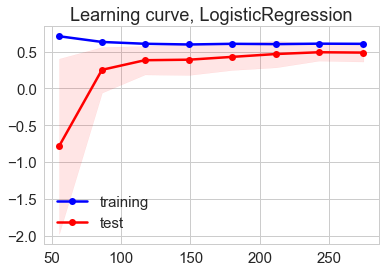

In [161]:

from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('clf', model)])
train_sizes, train_scores, test_scores = \
                learning_curve(estimator = pipe_lr,
                        X = X_train, y = Y_train,
                        train_sizes = np.linspace(0.2, 1.0, 8), 
                        cv = 10)

# learning curve ranges
def learningcurve_ranges(train_scores, test_scores):
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    return train_mean, train_std, test_mean, test_std

# plotting learning curve
def plot_learningcurve(train_sizes, train_scores, test_scores, model_name):
    train_mean, train_std, test_mean, test_std = learningcurve_ranges(train_scores, test_scores)
    plt.plot(train_sizes, train_mean, 'b', marker='o')
    plt.plot(train_sizes, test_mean, 'r', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = 'red', alpha = 0.1)
    
    plt.title('Learning curve, {}'.format(model_name))
    plt.legend(('training', 'test'), fancybox = True)
    plt.show()

plot_learningcurve(train_sizes, train_scores, test_scores, 'LogisticRegression')

# SVM Testing

In [163]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
SVM = SVC(kernel = 'linear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
accuracy_score(Y_test, Y_pred)


0.9805825242718447

In [164]:
SVM.score(X_train, Y_train)

0.9738562091503268

In [165]:
SVM.score(X_test, Y_test)

0.9805825242718447

Accuracy score shows a very good ability to classify.We now run a 5-fold CV on the dataset.

In [179]:
cross_val_score(SVM, X, Y, cv=10)

array([0.95238095, 0.95238095, 0.95238095, 0.9047619 , 0.95121951,
       1.        , 0.975     , 0.975     , 0.975     , 1.        ])

5-fold CV gives a stable out-of-sample around 98% accuracya prediciton almost identical to the 98% accuracy of the naive classifier.

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance

scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=11)
newX = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[7.59742088e-01 1.31997635e-01 5.72140633e-02 2.34721412e-02
 1.61721899e-02 9.51384407e-03 9.39474452e-04 5.00744691e-04
 2.34170061e-04 2.11542731e-04 2.10629640e-06]
[58.46434516 24.36918875 16.04387954 10.27624267  8.52987001  6.5423837
  2.05589289  1.50094982  1.02641663  0.97556689  0.09734592]


In [181]:
cross_val_score(SVM, newX, Y, cv=5)

array([0.97560976, 0.97560976, 0.93902439, 0.90243902, 0.95061728])

# Logistic Regression

In [182]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

logisticregression = LogisticRegression(C=1e9)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average score:')
print(sum(score)/4)

Coefficients
[[-194.5439417   282.25461721    2.15363752  468.32758528 -324.34960766
   -54.28721379  -21.05113458 -180.57909744  -77.45559745  -11.59146158
   -64.78392059]]
[-4.44952179]

 Accuracy by admission status
admitted    0    1
row_0             
0         184    2
1           1  222
0.9934640522875817

 Accuracy scores:
[0.96103896 0.94805195 0.98684211 0.97368421]

 Average score:
0.9674043062200958


In [ ]:
#admitted2 contains al the stats for HOF pitchers

master2= pd.merge(Pitching, HOF, left_index=True, right_index=True, on='playerID', how='inner');
master2 = master2.loc[lambda master2: master2['category'] == 'Player', :]
master2 = pd.merge(Pitching, HOF, on='playerID')
master2= master2.sort_values('playerID')
master2.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master2.loc[master2.playerID.isin(inductees)]
admitted3 = master2.loc[~master2.playerID.isin(inductees)]
#admitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
admitted2 = admitted2.drop_duplicates()
admitted2 = admitted2.groupby(['playerID']).sum()


In [ ]:
#neveradmitted2 contains all stats for not inducted pitchers

master3= pd.merge(Pitching, HOF2, left_index=True, right_index=True, on='playerID', how='inner');
master3 = master3.loc[lambda master3: master3['category'] == 'Player', :]
master3 = pd.merge(Pitching, HOF2, on='playerID')
master3= master3.sort_values('playerID')
#master3.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master3.loc[master3.playerID.isin(inductees)]
neveradmitted2 = master3.loc[~master3.playerID.isin(inductees)]
#neveradmitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
neveradmitted2 = neveradmitted2.drop_duplicates()
neveradmitted2 = neveradmitted2.groupby(['playerID']).sum()


# Random Forest Predictor

In [184]:
from sklearn.ensemble import RandomForestRegressor

clf1 =RandomForestRegressor(random_state=42, n_jobs=-1, 
                           n_estimators=200, max_depth=5,max_features=5, min_samples_split=10)

scores = cross_val_score(clf1, X_train, Y_train, cv=5)
print("crossValscores mean = {:.3f}".format(scores.mean()))
clf1.fit(X_train, Y_train)


y_pred = clf1.predict(X_test)
# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(Y_test, Y_pred))

crossValscores mean = 0.963
Final prediction score: [0.919]
